In [16]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go


array = []
x_array = []
y_array = []
z_array = []
x=0
y=0
z=0
for i in range(0,20):
    for j in range(0,20):
        x=i/4
        y=j/20
        x_array.append(x)
        y_array.append(y)
        r=5
        if j>r:
            z=1
        elif j<r:
            z=0
        z_array.append(z)
        array.append([x,y,z])
print(len(array)) 
trace1 = go.Scatter3d(
    x=x_array,
    y=y_array,
    z=z_array,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

data = [trace1]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='simple-3d-scatter')

400


In [17]:
#network}
#   o  inside/outside
#  / \
#  o o 2 hidden layers for more complexity to uncover square structure
#  / \  w1,w2,b
# o   o length, width
weights_layer1=[]
for i in range(4):
    weights_layer1.append(np.random.randn())
    
weights_layer1 = np.reshape(weights_layer1,(2,2))

weights_layer2=[]
for j in range(2):
    weights_layer2.append(np.random.randn()) 
    
b=[]
for i in range(2):
    b.append(np.random.randn())
    
print(weights_layer1)
print(weights_layer2)
print(b)


[[ 1.00960861  1.13878192]
 [-0.03268983 -0.85773746]]
[-0.8398894244045518, 0.8084526433297067]
[0.5266034411181404, 0.9221920261928422]


In [18]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_p(x):
    return sigmoid(x)*(1-sigmoid(x))

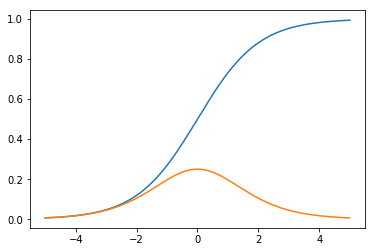

In [19]:
x = np.linspace(-5,5,1000)
y1 = sigmoid(x)
y2 = sigmoid_p(x)
plt.plot(x,y1)
plt.plot(x,y2)

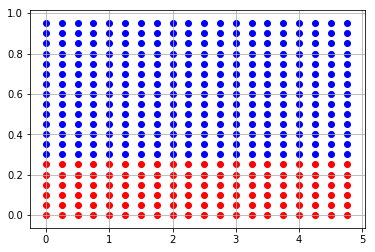

In [20]:
#scatter plot
plt.grid()
for i in range(len(array)):
    point = array[i]
    color = 'r'
    if point[2]==1:
        color='b'
    plt.scatter(point[0],point[1],c=color)

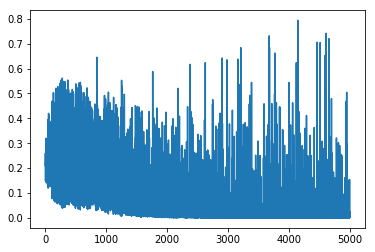

In [21]:
#<neural network>
length=len(array)
learning_rate = 0.2
costs = []

weights_layer1=[]
for i in range(4):
    weights_layer1.append(np.random.randn())
weights_layer1 = np.reshape(weights_layer1,(2,2))

weights_layer2=[]
for j in range(2):
    weights_layer2.append(np.random.randn()) 
weights_layer2 = np.reshape(weights_layer2,(1,2))
    
b=[]
for i in range(2):
    b.append(np.random.randn())
b=np.reshape(b,(2,1))
flag = 0
for i in range(5000):
    flag+=1
    ri = np.random.randint(length)
    point = array[ri]
    activ = point[0:2]
    activ = np.transpose(activ)
    activ = np.reshape(activ,(2,1))

    #print(b)
    
    l1 = np.dot(weights_layer1,activ)+b #[2,2]*[2,1] +[2,1] --> [2,1]
    #print(l1)
    l1_squish=sigmoid(l1)
    #print(l1_squish)
    z = np.dot(weights_layer2,l1_squish) #[1,2]*[2,1] --> [1,1] 
    #print(z)
    pred=sigmoid(z)
    #print(pred)
    
    target = point[2]
    #print(target)
    cost = np.square(pred-target)
    #print(flag)
    #if flag<2:
    costs.append(cost[0][0])
    '''else:
        cost_len = len(costs)
        #print(cost_len)
        diff = costs[cost_len-1]-cost
        #print(diff)
        
    if flag>2 and diff<.2:
        costs.append(cost[0][0])'''
    
    
    dcost_dpred = 2*(pred-target)
    #print(dcost_dpred)
    dpred_dz = sigmoid_p(z)
    #print(dpred_dz)
    dcost_dz =  dcost_dpred* dpred_dz
    #print(dcost_dz)
    dz_dweights_layer2 = np.transpose(l1_squish)
    #print(dz_dweights_layer2)
    dz_dl1_squish = np.transpose(weights_layer2)
    #print(dz_dl1_squish)
    dl1_squish_dl1 = sigmoid_p(l1)
    #print(dl1_squish_dl1)
    dl1_dweights_layer1 = np.transpose(activ)
    #print(dl1_dweights_layer1)
    dl1_db = 1
    
    dcost_dweights_layer1 = dcost_dz*dz_dl1_squish*np.dot(dl1_squish_dl1,dl1_dweights_layer1)
    # [1,1]*[2,1]*[2,1]*[1,2]
    #print(dcost_dweights_layer1)
    dcost_dweights_layer2 = np.dot(dcost_dz, dz_dweights_layer2)
    #[1,1] * [1,2]
    #print(dcost_dweights_layer2)
    dcost_db =  dcost_dz*dz_dl1_squish*np.dot(dl1_squish_dl1,dl1_db)
    # [1,1]*[2,1]*[2,1]*[1,1]
    #print(dcost_db)

    weights_layer1 = weights_layer1-np.multiply(learning_rate,dcost_dweights_layer1)
    weights_layer2 = weights_layer2-np.multiply(learning_rate,dcost_dweights_layer2)
    b = b-np.multiply(learning_rate,dcost_db)
    
    
    '''if i%100==0:
        cost_sum = 0
        for j in range(len(array)):
            p = array[j]
            activ = p[0:2]
            activ = np.transpose(activ)
            activ = np.reshape(activ,(2,1))
            l1 = np.dot(weights_layer1,activ)+b
            l1_squish=sigmoid(l1)
            z = np.dot(weights_layer2,l1_squish) 
            pred=sigmoid(z)
            target = point[2]
            cost_sum += np.square(pred-target)
            cost_sum_value = cost_sum[0][0]
        costs.append(cost_sum_value/len(array))''' 
        
plt.plot(costs)

In [23]:
import os

In [24]:
def predict(x,y):
    activ=[[x],[y]]
    l1 = np.dot(weights_layer1,activ)+b
    l1_squish=sigmoid(l1)
    z = np.dot(weights_layer2,l1_squish) 
    pred=sigmoid(z)
    print(pred)
    if pred<.5:
        os.system("say the point is under the curve")
    else:
        os.system("say the point is above the curve")

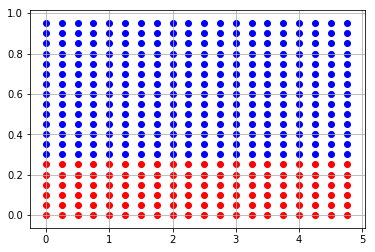

In [25]:
#scatter plot
plt.grid()
for i in range(len(array)):
    point = array[i]
    color = 'r'
    if point[2]==1:
        color='b'
    plt.scatter(point[0],point[1],c=color)

In [56]:
predict(2,.24)

[[0.47938843]]
